In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\nike_sales_2024.csv")

In [9]:
df

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160
...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [11]:
df.describe()

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,28498.951000,5.039576e+06,70.040000,176.32000
std,12926.495678,3.267217e+06,11.748635,75.26169
min,5028.000000,2.874000e+05,50.000000,50.00000
25%,17554.250000,2.344675e+06,60.000000,110.00000
50%,28685.000000,4.328020e+06,71.000000,180.00000
75%,40026.000000,7.264942e+06,80.000000,240.00000
max,49992.000000,1.486470e+07,90.000000,300.00000


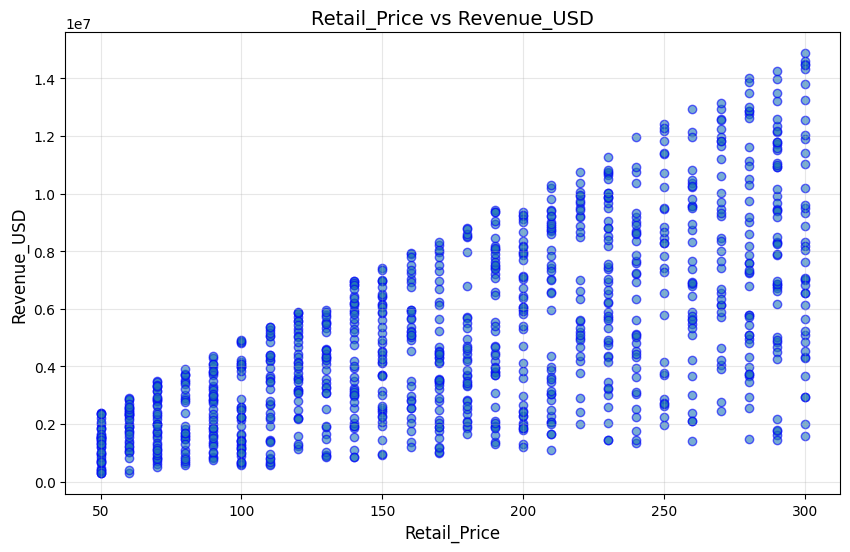

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Retail_Price"], df["Revenue_USD"], alpha=0.6, edgecolor='b')
plt.title("Retail_Price vs Revenue_USD", fontsize=14)
plt.xlabel("Retail_Price", fontsize=12)
plt.ylabel("Revenue_USD", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

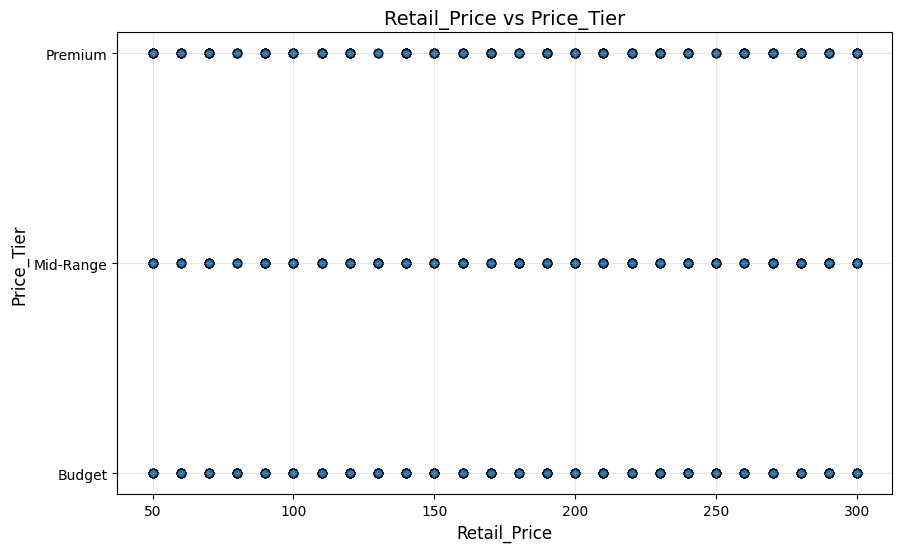

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Retail_Price"], df["Price_Tier"], alpha=0.6, edgecolor='k')
plt.title("Retail_Price vs Price_Tier", fontsize=14)
plt.xlabel("Retail_Price", fontsize=12)
plt.ylabel("Price_Tier", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

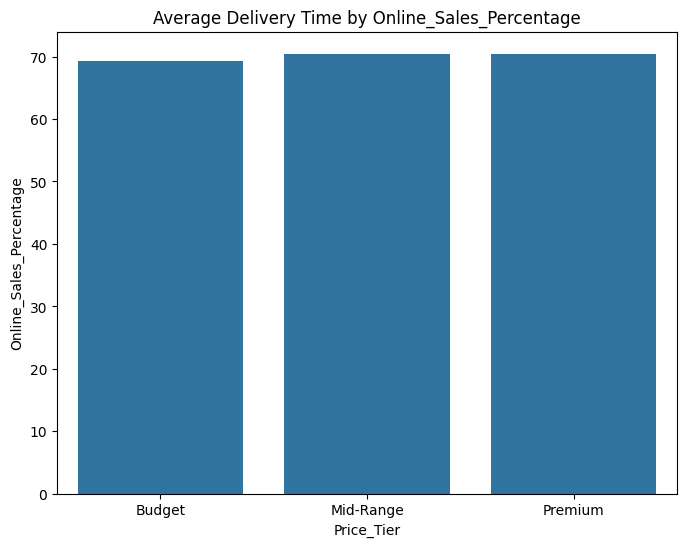

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Price_Tier', y='Online_Sales_Percentage', data=df, errorbar=None)
plt.title("Average Delivery Time by Online_Sales_Percentage")
plt.xlabel("Price_Tier")
plt.ylabel("Online_Sales_Percentage")
plt.show()

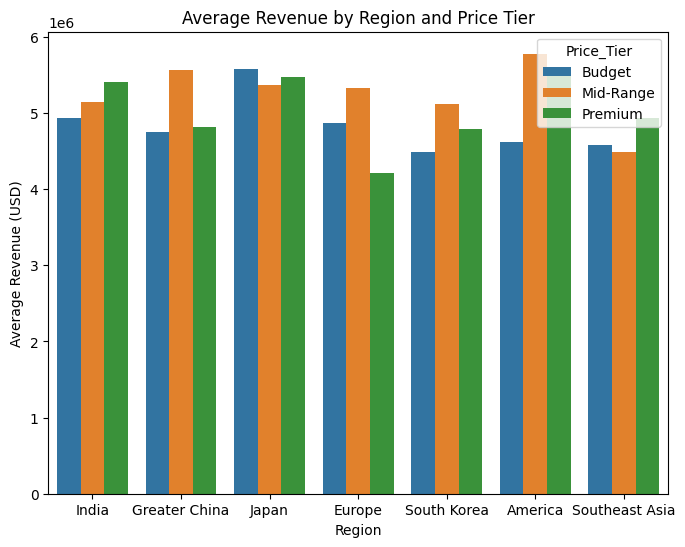

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Revenue_USD', data=df, errorbar=None, hue='Price_Tier')
plt.title("Average Revenue by Region and Price Tier")
plt.xlabel("Region")
plt.ylabel("Average Revenue (USD)")
plt.show()

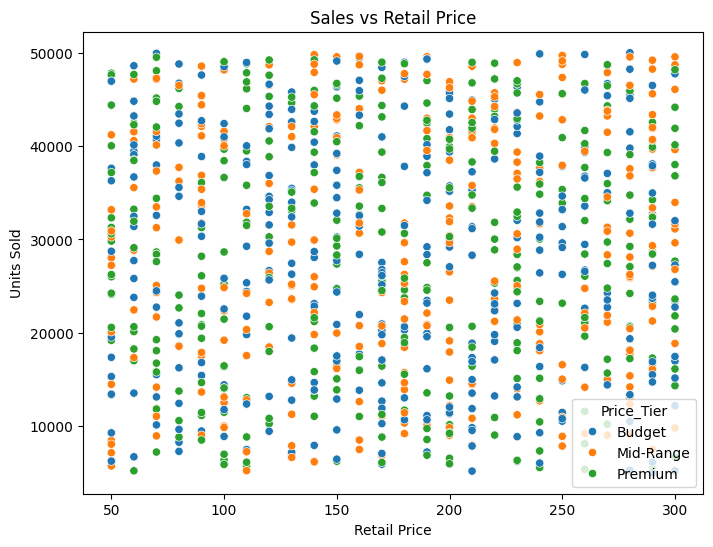

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Retail_Price', y='Units_Sold', data=df, hue='Price_Tier')
plt.title("Sales vs Retail Price")
plt.xlabel("Retail Price")
plt.ylabel("Units Sold")
plt.show()

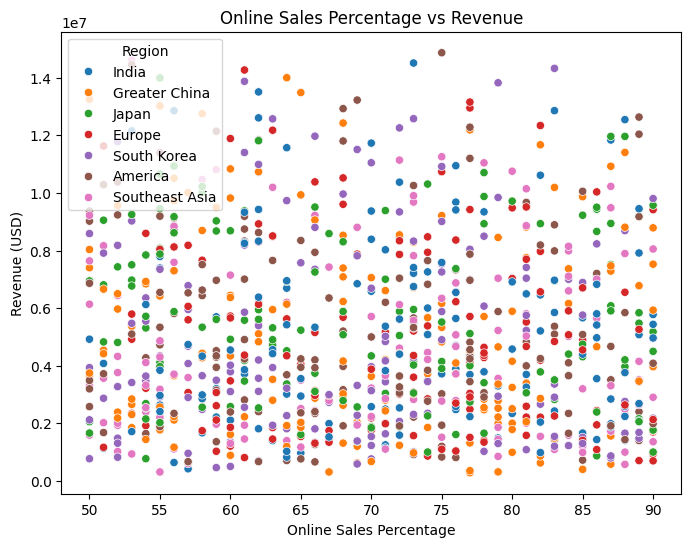

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Online_Sales_Percentage', y='Revenue_USD', data=df, hue='Region')
plt.title("Online Sales Percentage vs Revenue")
plt.xlabel("Online Sales Percentage")
plt.ylabel("Revenue (USD)")
plt.show()

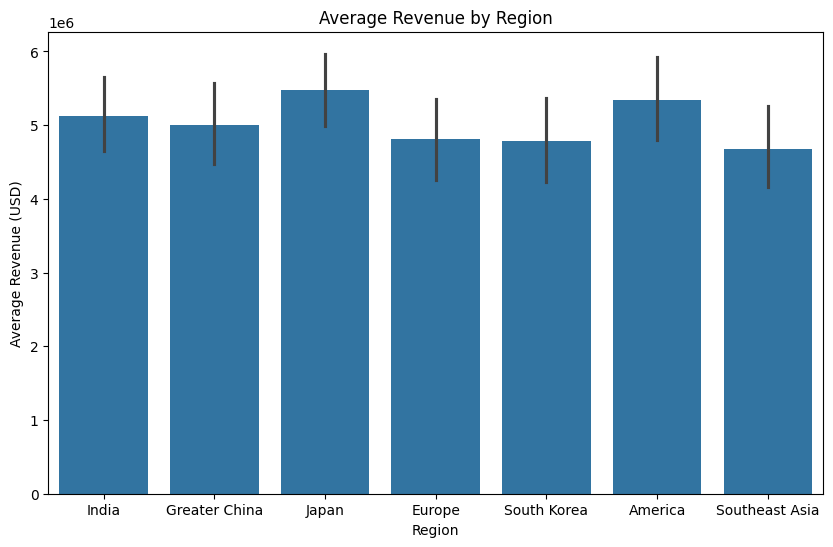

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Revenue_USD', data=df, estimator='mean')
plt.title("Average Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Average Revenue (USD)")
plt.show()

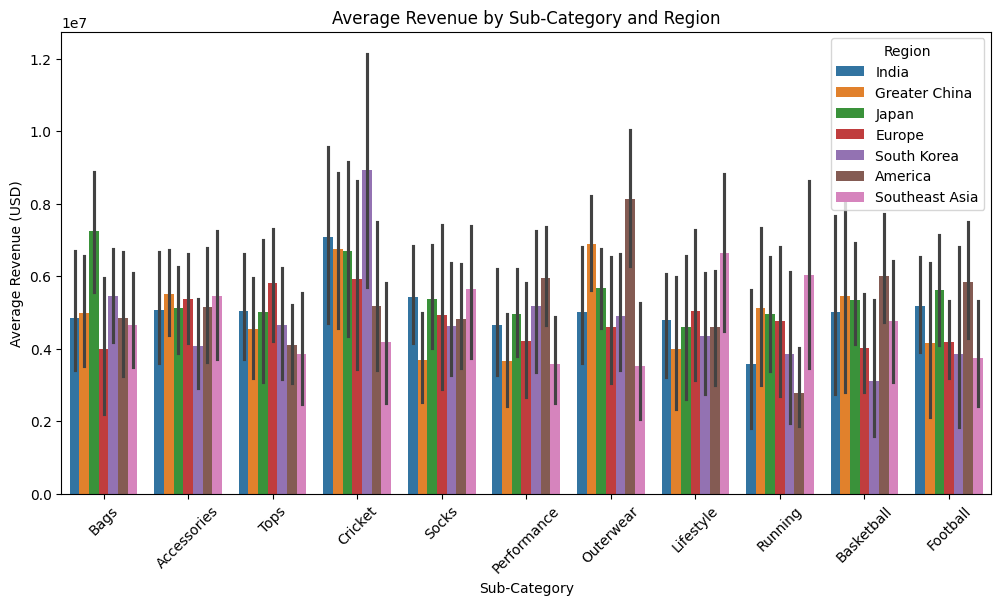

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub_Category', y='Revenue_USD', data=df, estimator='mean', hue='Region')
plt.title("Average Revenue by Sub-Category and Region")
plt.xlabel("Sub-Category")
plt.ylabel("Average Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

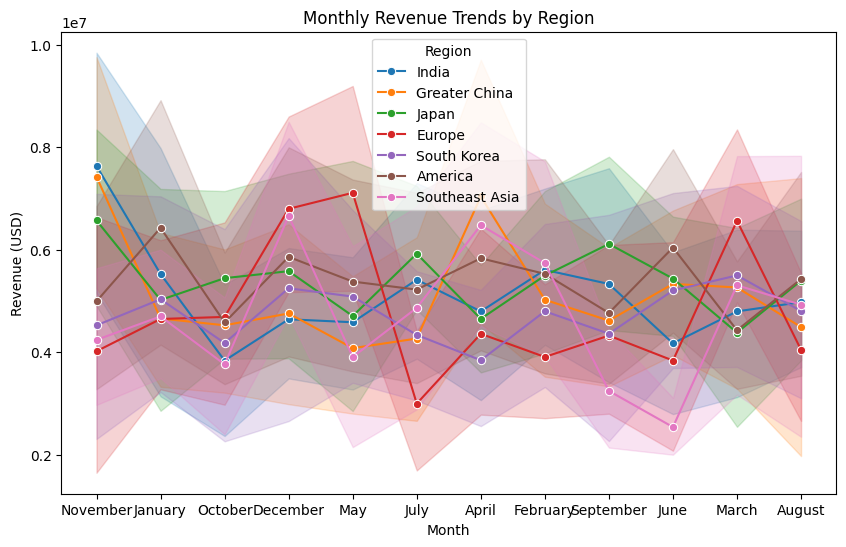

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Revenue_USD', data=df, hue='Region', marker='o')
plt.title("Monthly Revenue Trends by Region")
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.show()

In [21]:
df.isnull().sum()

Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64

In [22]:
num_duplicates = df.duplicated().sum()
print(f"Count of duplicates: {num_duplicates}")

Count of duplicates: 0


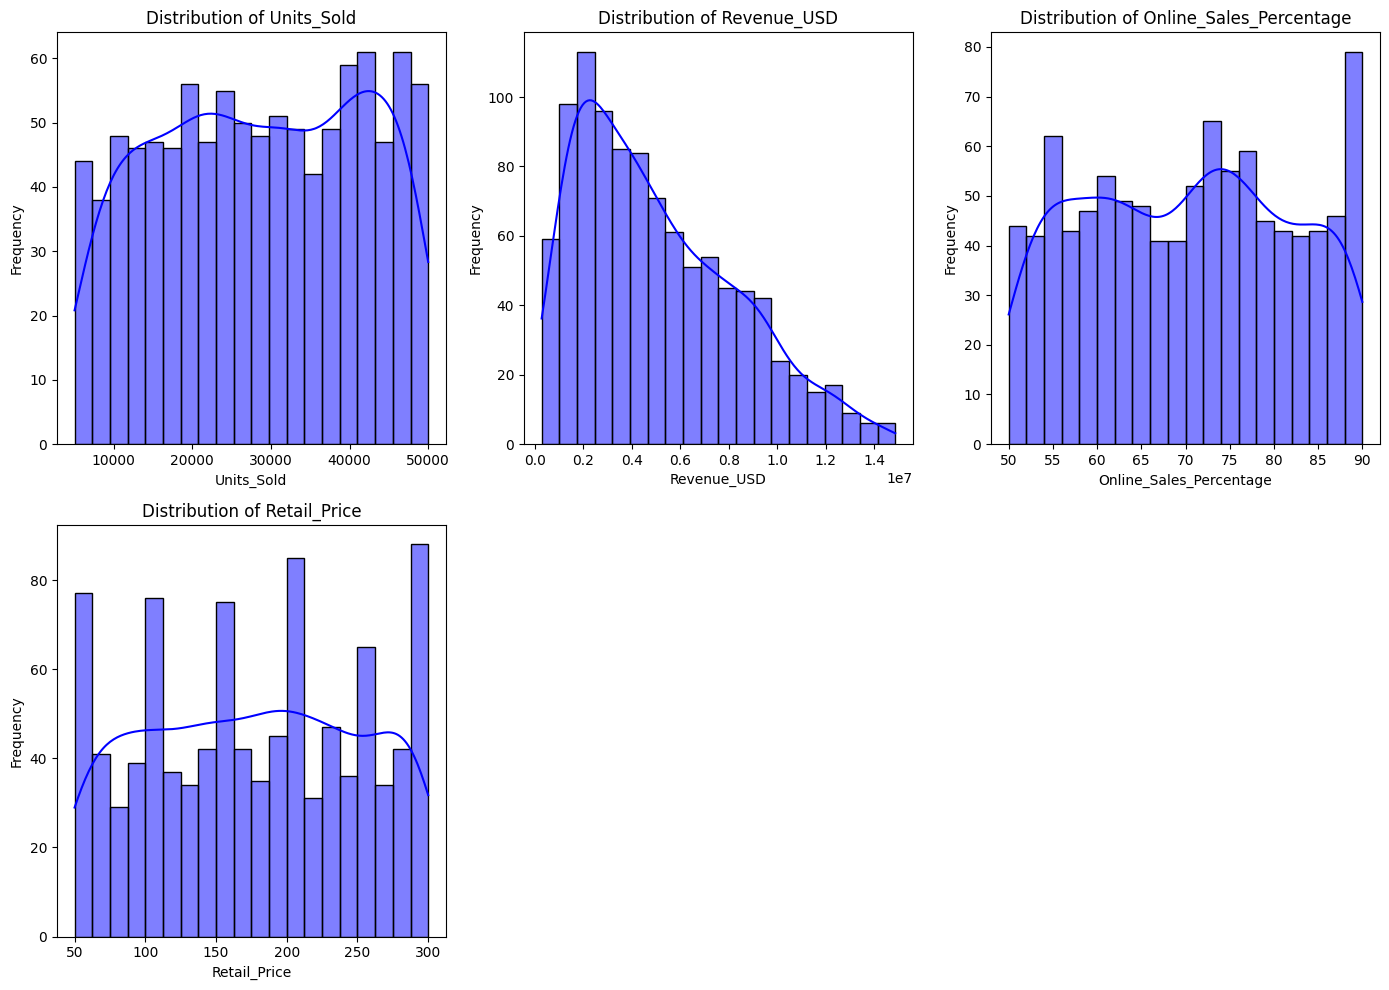

In [23]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

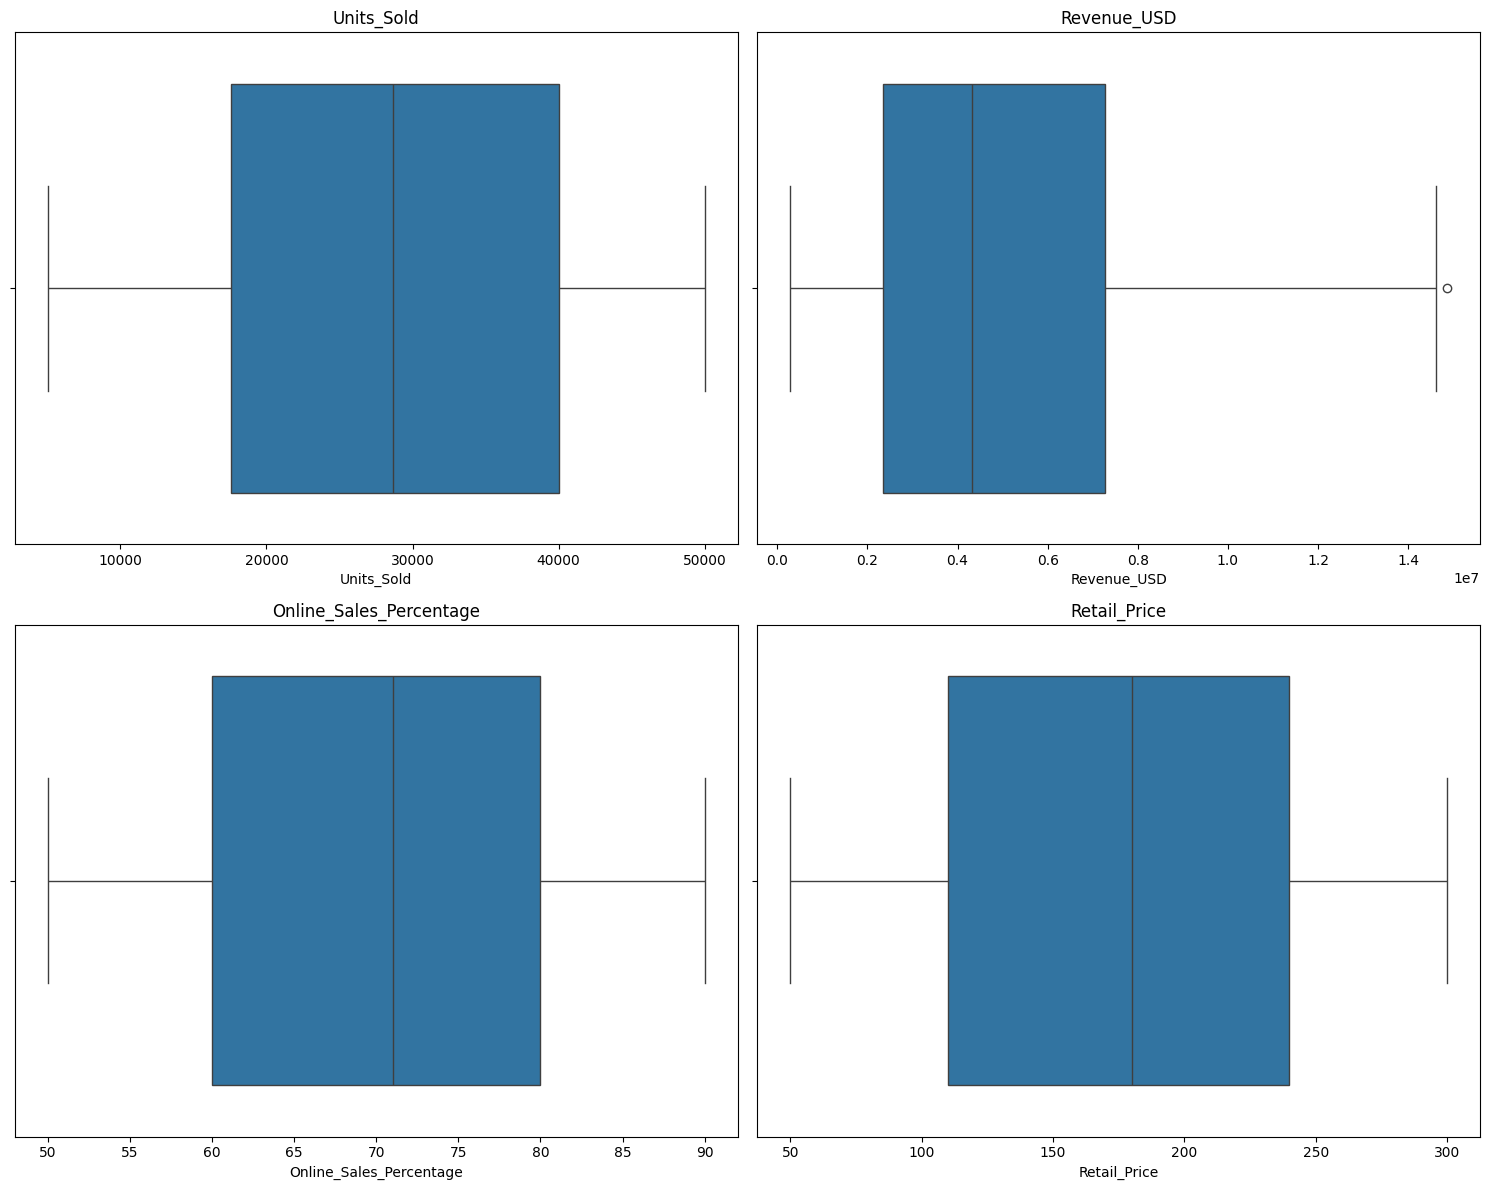

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x=df['Units_Sold'], ax=axes[0, 0])
axes[0, 0].set_title('Units_Sold')

sns.boxplot(x=df['Revenue_USD'], ax=axes[0, 1])
axes[0, 1].set_title('Revenue_USD')

sns.boxplot(x=df['Online_Sales_Percentage'], ax=axes[1, 0])
axes[1, 0].set_title('Online_Sales_Percentage')

sns.boxplot(x=df['Retail_Price'], ax=axes[1, 1])
axes[1, 1].set_title('Retail_Price')

plt.tight_layout()
plt.show()

In [25]:
Q1 = df['Revenue_USD'].quantile(0.25)
Q3 = df['Revenue_USD'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Revenue_USD'] < lower_bound) | (df['Revenue_USD'] > upper_bound)]

print(f"Number of emissions in fiche '{'Revenue_USD'}': {outliers.shape[0]}")

for i in df['Revenue_USD']:
    if i > upper_bound:
        print(f'That one outlier in "Revenue_USD" makes a difference: {i}')

Number of emissions in fiche 'Revenue_USD': 1
That one outlier in "Revenue_USD" makes a difference: 14864700


In [26]:
df['Revenue_USD'].sort_values().tail(1)

213    14864700
Name: Revenue_USD, dtype: int64

                         Units_Sold  Revenue_USD  Online_Sales_Percentage  \
Units_Sold                 1.000000     0.713768                -0.014759   
Revenue_USD                0.713768     1.000000                -0.055484   
Online_Sales_Percentage   -0.014759    -0.055484                 1.000000   
Retail_Price               0.014038     0.666556                -0.062131   

                         Retail_Price  
Units_Sold                   0.014038  
Revenue_USD                  0.666556  
Online_Sales_Percentage     -0.062131  
Retail_Price                 1.000000  


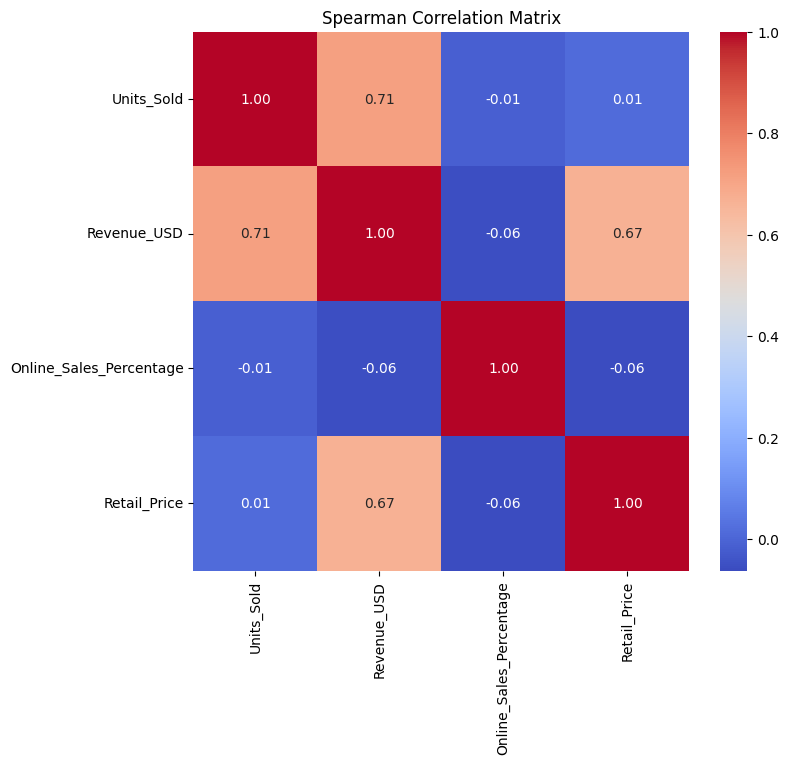

In [27]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

print(spearman_corr)

plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [29]:
data = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\nike_sales_2024.csv")

In [30]:
le=LabelEncoder()
data["Month"]=le.fit_transform(data["Month"])
data["Region"]=le.fit_transform(data["Region"])
data["Main_Category"]=le.fit_transform(data["Main_Category"])
data["Sub_Category"]=le.fit_transform(data["Sub_Category"])
data["Product_Line"]=le.fit_transform(data["Product_Line"])
data["Price_Tier"]=le.fit_transform(data["Price_Tier"])

In [31]:
ss=StandardScaler()
x=data.drop("Retail_Price",axis=1)
y=data["Retail_Price"]
x=ss.fit_transform(x)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [35]:
models={
    "Linear Regression":LinearRegression(),
    "Random Forest Regression":RandomForestRegressor(),
    "Decision Tree Regression":DecisionTreeRegressor(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "XGBoost Regression":XGBRegressor(),
    "KNN Regression":KNeighborsRegressor(),
}

In [36]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    print(f"{name}")
    print(f"{r2*100}")
    print("-"*70)

Linear Regression
83.82847673922437
----------------------------------------------------------------------
Random Forest Regression
98.90911692072446
----------------------------------------------------------------------
Decision Tree Regression
95.82589786325524
----------------------------------------------------------------------
Ridge Regression
83.81712943760863
----------------------------------------------------------------------
Lasso Regression
83.85889879603316
----------------------------------------------------------------------
XGBoost Regression
98.69315028190613
----------------------------------------------------------------------
KNN Regression
47.1228780770854
----------------------------------------------------------------------


In [37]:
results={
    "Model":["Linear Regression","Random Forest REgression","Decision Tree Regression","Ridge REgression","Lasso Regression","XGBoost Regression","KNN"],
    "Accuracy":[83.82,98.97,95.96,83.81,83.85,98.69,47.12]
}

In [38]:
results_df=pd.DataFrame(results)

In [ ]:
sns.barplot(y="Model",x="Accuracy",data=results_df,color="purple")
plt.xlim(40,100)
plt.show()